In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

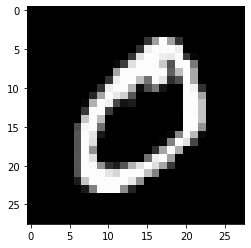

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap = 'gray')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
encoder_input = keras.Input(shape = (28,28,1,1), name = 'img')
enc_flat = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64,activation = 'relu')(enc_flat)

In [ ]:
encoder = keras.Model(encoder_input, encoder_output, name = 'encoder')

In [ ]:
dec_interim = keras.layers.Dense(784, activation = 'relu')(encoder_output)
decoder_output = keras.layers.Reshape(target_shape = (28,28,1))(dec_interim)

In [ ]:
decoder = keras.Model(encoder_output, decoder_output, name = 'decoder')

In [ ]:
opt = keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)

In [ ]:
autoencoder = keras.Model(encoder_input, decoder_output, name = 'autoencoder')

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1, 1)]    0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(opt, loss='mse')

In [ ]:
autoencoder.fit(x_train, x_train, epochs = 3, batch_size = 32, validation_split = 0.1)

Epoch 1/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0172 - val_loss: 0.0113
Epoch 2/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0108 - val_loss: 0.0105
Epoch 3/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0103 - val_loss: 0.0102


<Figure size 432x288 with 0 Axes>

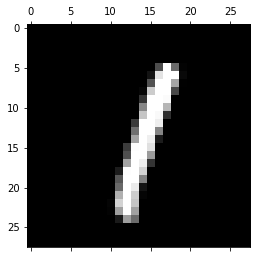

In [ ]:
plt.gray()
plt.matshow(x_test[5])

In [ ]:
en_out = encoder.predict([x_test[5].reshape(-1, 28, 28, 1)])

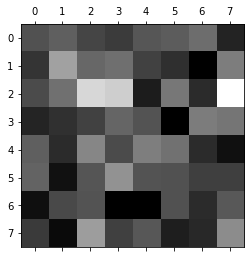

In [ ]:
plt.matshow(en_out[0].reshape(8,8))

In [ ]:
dec_out = decoder.predict(en_out[0].reshape(-1,64))

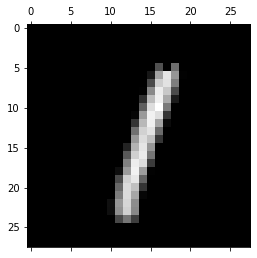

In [ ]:
plt.matshow(dec_out.reshape(28,28))

In [ ]:
ae_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)])

In [ ]:
ae_out.shape

(1, 28, 28, 1)